In [13]:
# 1. Load Data

import h5py
import numpy as np

# Adjust path as needed
with h5py.File('../data/bird_spectrograms_splits.hdf5', 'r') as f:
    X_train = f['X_train'][:]
    y_train = f['y_train'][:]
    X_val = f['X_val'][:]
    y_val = f['y_val'][:]
    X_test = f['X_test'][:]
    y_test = f['y_test'][:]

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")


Train: (1074, 343, 256), Validation: (231, 343, 256), Test: (231, 343, 256)
Number of classes: 12


In [14]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_shape = X_train.shape[1:]

model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Reshape((343, 256, 1)),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', 'mae']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, 343, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 343, 256, 8)    │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 171, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 171, 128, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 85, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 85, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 42, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,620 (25.86 KB)

 Trainable params: 6,620 (25.86 KB)

 Non-trainable params: 0 (0.00 B)

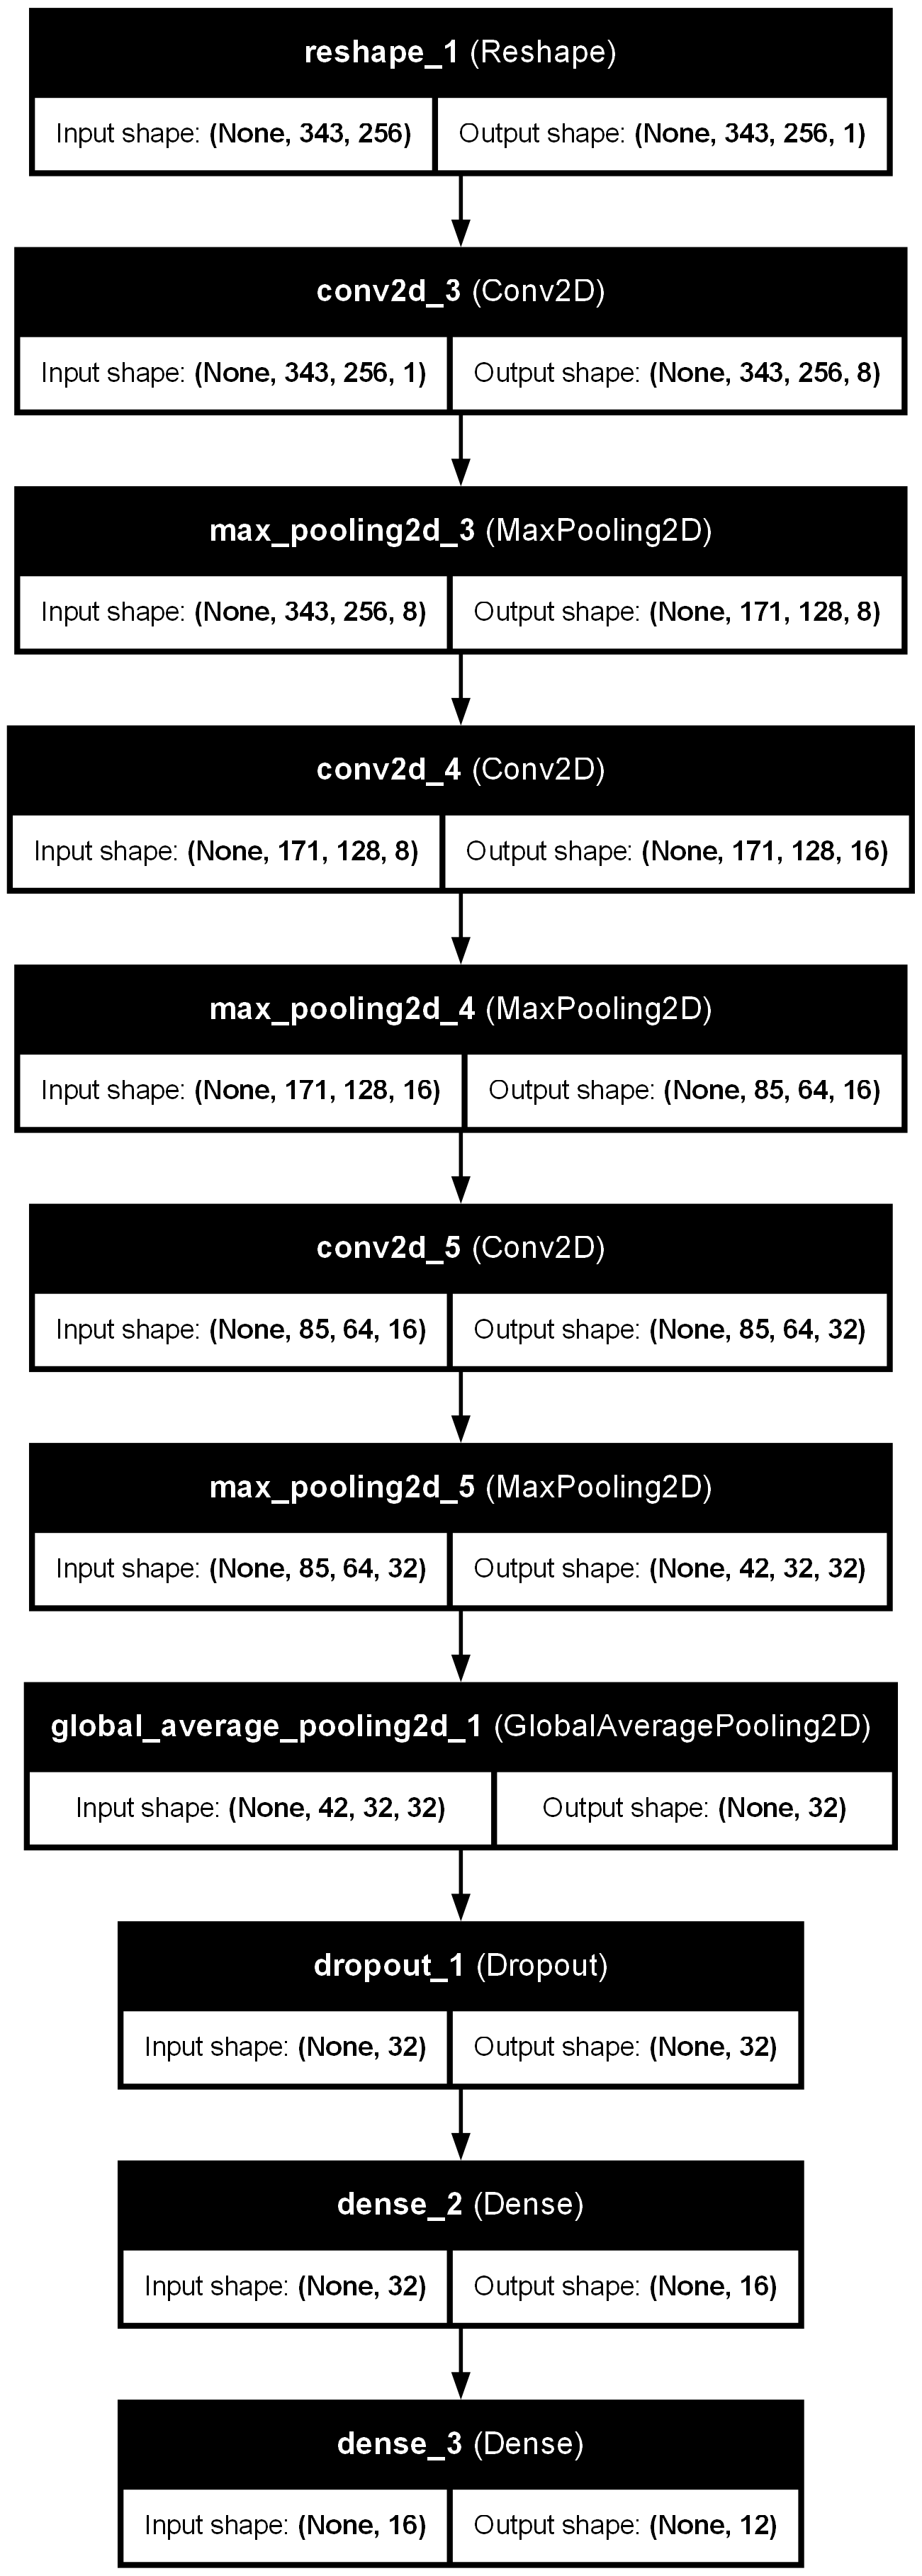

In [16]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='multiclass_cnn_architecture.png', show_shapes=True, show_layer_names=True)
Image('multiclass_cnn_architecture.png')


In [17]:
history = model.fit(
    X_train, y_train_cat,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val_cat)
)


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.0734 - loss: 2.4899 - mae: 0.1528 - val_accuracy: 0.0866 - val_loss: 2.4788 - val_mae: 0.1527
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.0788 - loss: 2.4691 - mae: 0.1525 - val_accuracy: 0.1818 - val_loss: 2.3977 - val_mae: 0.1515
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.1259 - loss: 2.3693 - mae: 0.1508 - val_accuracy: 0.1991 - val_loss: 2.0938 - val_mae: 0.1454
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.1758 - loss: 2.0938 - mae: 0.1439 - val_accuracy: 0.2771 - val_loss: 1.7656 - val_mae: 0.1345
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.2451 - loss: 1.8744 - mae: 0.1357 - val_accuracy: 0.3896 - val_loss: 1.5714 - val_mae: 0.1295
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.2721 - loss: 1.7511 - mae: 0.1323 - val_accuracy: 0.4416 - val_loss: 1.4605 - val_mae: 0.1255
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s

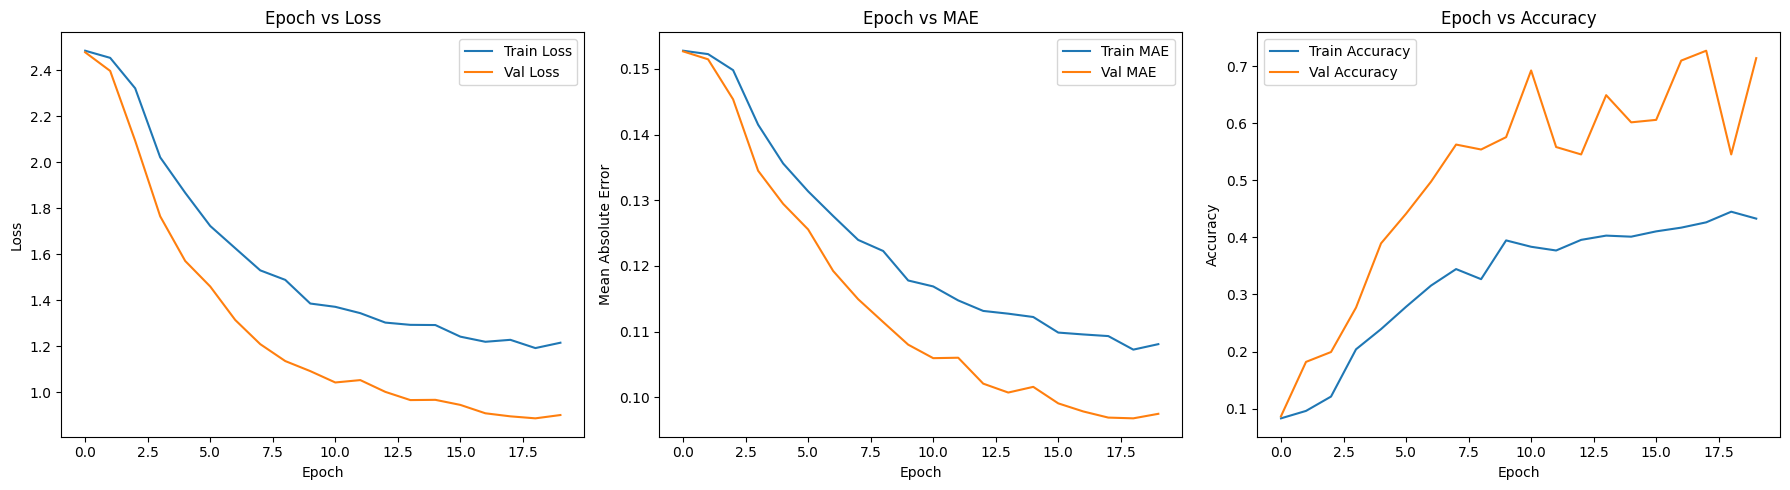

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()

mae_key = 'mae' if 'mae' in history.history else 'mean_absolute_error'
val_mae_key = 'val_mae' if 'val_mae' in history.history else 'val_mean_absolute_error'
plt.subplot(1, 3, 2)
plt.plot(history.history[mae_key], label='Train MAE')
plt.plot(history.history[val_mae_key], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Epoch vs MAE')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [19]:
test_loss, test_acc, test_mae = model.evaluate(X_test, y_test_cat, verbose=2)
print(f"Test accuracy: {test_acc:.3f}, Test MAE: {test_mae:.3f}")


8/8 - 0s - 37ms/step - accuracy: 0.6840 - loss: 0.9108 - mae: 0.0978
Test accuracy: 0.684, Test MAE: 0.098


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

species_labels = [
    'amecro', 'amerob', 'bewwre', 'bkcchi', 'daejun', 'houfin',
    'houspa', 'norfli', 'rewbla', 'sonspa', 'spotow', 'whcspa'
]

y_pred = np.argmax(model.predict(X_test), axis=1)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=species_labels))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Confusion Matrix:
[[14  0  0  0  0  0  0  0  0  0  0  5]
 [ 0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  4 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0 10  0  0  0  0]
 [ 0  0  2  0 13  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19]
 [ 0  0  0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  3  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0]
 [ 0  0  6  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19]]

Classification Report:
              precision    recall  f1-score   support

      amecro       1.00      0.74      0.85        19
      amerob       0.83      1.00      0.90        19
      bewwre       0.65      0.79      0.71        19
      bkcchi       0.77      0.50      0.61        20
      daejun       1.00      0.68      0.81        19
      houfin       0.00      0.00      0.00        19
      houspa       0.00      0.00      0.00        20
      norfli      

c:\Users\mohdk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mohdk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mohdk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo